In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\intern\Desktop\Internship projects\Sentiment Analysis\Inaph\INAPH_Reviews.csv")
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,e991ea36-3e0d-41ec-be8a-3a66918e9a79,kodanda ram chowdary,https://play-lh.googleusercontent.com/a-/AD_cM...,Not responding well,1,0,1.32.93,2023-05-24 22:13:22,NaN,NaN,1.32.93
1,1,d8fa5d28-5916-46c1-871d-94008044211d,मुकेश कुमार गुप्ता,https://play-lh.googleusercontent.com/a-/AD_cM...,"Very bad and worst experience, this version is...",2,0,1.32.93,2023-05-24 15:50:16,NaN,NaN,1.32.93
2,2,6893ae6f-0cd8-4bff-9501-8cec0bdc3818,Divyansh Yadav,https://play-lh.googleusercontent.com/a/AAcHTt...,How to get username and password,3,0,NaN,2023-05-23 20:51:25,NaN,NaN,NaN
3,3,ae12739d-65c0-4c21-b258-59e6698e6254,ashok kumar,https://play-lh.googleusercontent.com/a/AAcHTt...,wyle Jjlllp lk Li,2,0,1.32.93,2023-05-23 07:09:02,NaN,NaN,1.32.93
4,4,27838d35-ec02-4eda-8239-6bfa66120cd6,Ravikumar CTR.20.080,https://play-lh.googleusercontent.com/a/AAcHTt...,Good,5,0,1.32.93,2023-05-22 13:44:58,NaN,NaN,1.32.93


In [3]:
df = df.drop('Unnamed: 0', axis=1)
#df.drop('reviewId', axis=1)

In [4]:
df = df.drop('reviewId', axis=1)
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,kodanda ram chowdary,https://play-lh.googleusercontent.com/a-/AD_cM...,Not responding well,1,0,1.32.93,2023-05-24 22:13:22,NaN,NaN,1.32.93
1,मुकेश कुमार गुप्ता,https://play-lh.googleusercontent.com/a-/AD_cM...,"Very bad and worst experience, this version is...",2,0,1.32.93,2023-05-24 15:50:16,NaN,NaN,1.32.93
2,Divyansh Yadav,https://play-lh.googleusercontent.com/a/AAcHTt...,How to get username and password,3,0,NaN,2023-05-23 20:51:25,NaN,NaN,NaN
3,ashok kumar,https://play-lh.googleusercontent.com/a/AAcHTt...,wyle Jjlllp lk Li,2,0,1.32.93,2023-05-23 07:09:02,NaN,NaN,1.32.93
4,Ravikumar CTR.20.080,https://play-lh.googleusercontent.com/a/AAcHTt...,Good,5,0,1.32.93,2023-05-22 13:44:58,NaN,NaN,1.32.93


In [5]:
df.isnull().sum()

userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion    125
at                        0
replyContent            573
repliedAt               573
appVersion              125
dtype: int64

In [6]:
# helper function to draw percentage above each bar
def draw_percentage(ax,total=float(len(df))):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center',va='bottom')

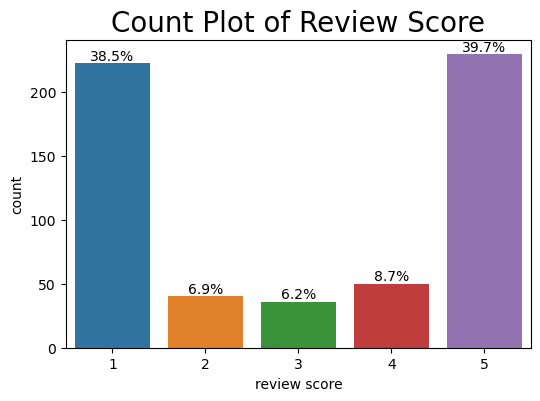

In [7]:
plt.figure(figsize = (6,4))
total = float(len(df))
ax = sns.countplot(x = 'score',data=df)
plt.title('Count Plot of Review Score', fontsize=20)
plt.xlabel('review score')
draw_percentage(ax)
plt.show()

C:\Users\intern\AppData\Local\Temp\ipykernel_4900\3986371059.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['score'], bins = 5)


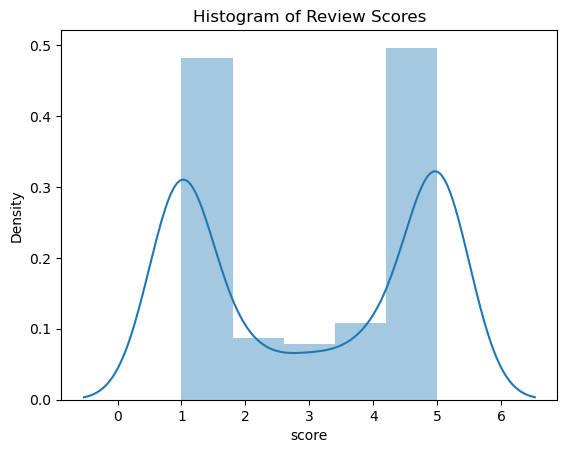

Most Common Score:  5


In [8]:
#Plot a histogram of review scores. These can be accessed in the df.score field in the above dataframe.

sns.distplot(df['score'], bins = 5)
plt.title("Histogram of Review Scores")
plt.show()
print("Most Common Score: ", df.score.value_counts().index[0])

# NLTK

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import operator
sia = SentimentIntensityAnalyzer()

In [10]:
a = "Tis is a good software"
sia.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [11]:
data = pd.read_csv(r"C:\Users\intern\Desktop\Internship projects\Sentiment Analysis\Inaph\trial.csv")
data= data[['content']]
data.head()

,content
0,Not responding well
1,"Very bad and worst experience, this version is..."
2,How to get username and password
3,wyle Jjlllp lk Li
4,Good


In [12]:
sia.polarity_scores(data.loc[0]['content'])

{'neg': 0.476, 'neu': 0.524, 'pos': 0.0, 'compound': -0.2057}

In [13]:
data['scores'] = data['content'].apply(lambda content: sia.polarity_scores(content))
data.head()

,content,scores
0,Not responding well,"{'neg': 0.476, 'neu': 0.524, 'pos': 0.0, 'comp..."
1,"Very bad and worst experience, this version is...","{'neg': 0.631, 'neu': 0.369, 'pos': 0.0, 'comp..."
2,How to get username and password,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,wyle Jjlllp lk Li,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [14]:
results = []
for i in data['content']:
    pol_score = sia.polarity_scores(i)
    pol_score['content'] = i
    results.append(pol_score)
    
    print(results[-1])
    print("")
print(results[-1])

{'neg': 0.476, 'neu': 0.524, 'pos': 0.0, 'compound': -0.2057, 'content': 'Not responding well'}

{'neg': 0.631, 'neu': 0.369, 'pos': 0.0, 'compound': -0.9178, 'content': 'Very bad and worst experience, this version is very bad.'}

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'content': 'How to get username and password'}

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'content': 'wyle Jjlllp lk Li'}

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404, 'content': 'Good'}

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'content': 'There should also be a report of the money received by Ai workers inside this app.'}

{'neg': 0.203, 'neu': 0.696, 'pos': 0.101, 'compound': -0.3244, 'content': 'Challenge is about using in rural area... Not that work friendly'}

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404, 'content': 'Good'}

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'content': 'Why this app needs permission to music, audio and contacts to wo

In [15]:
data = pd.DataFrame.from_records(results)
data.head()

,neg,neu,pos,compound,content
0,0.476,0.524,0.0,-0.2057,Not responding well
1,0.631,0.369,0.0,-0.9178,"Very bad and worst experience, this version is..."
2,0.000,1.000,0.0,0.0000,How to get username and password
3,0.000,1.000,0.0,0.0000,wyle Jjlllp lk Li
4,0.000,0.000,1.0,0.4404,Good


In [16]:
data['label']=0
data.loc[data['compound'] > 0.2, 'label'] = 1
data.loc[data['compound'] < -0.2, 'label'] = -1
data.head()

,neg,neu,pos,compound,content,label
0,0.476,0.524,0.0,-0.2057,Not responding well,-1
1,0.631,0.369,0.0,-0.9178,"Very bad and worst experience, this version is...",-1
2,0.000,1.000,0.0,0.0000,How to get username and password,0
3,0.000,1.000,0.0,0.0000,wyle Jjlllp lk Li,0
4,0.000,0.000,1.0,0.4404,Good,1


In [17]:
#pip install wordcloud

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
#text = data['content'].values 

#wordcloud = WordCloud().generate(str(text))

#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

# Text Blob

In [20]:
from textblob import TextBlob

In [21]:
df = data[['content']]
df.head()

,content
0,Not responding well
1,"Very bad and worst experience, this version is..."
2,How to get username and password
3,wyle Jjlllp lk Li
4,Good


In [22]:
df["sentiment_score"] = df["content"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head()

C:\Users\intern\AppData\Local\Temp\ipykernel_4900\665056103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment_score"] = df["content"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


,content,sentiment_score
0,Not responding well,0.00
1,"Very bad and worst experience, this version is...",-0.94
2,How to get username and password,0.00
3,wyle Jjlllp lk Li,0.00
4,Good,0.70


In [23]:
df['label']=0
df.loc[df['sentiment_score'] > 0.2, 'label'] = 1
df.loc[df['sentiment_score'] < -0.2, 'label'] = -1
df.head()

C:\Users\intern\AppData\Local\Temp\ipykernel_4900\2942833242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=0


,content,sentiment_score,label
0,Not responding well,0.00,0
1,"Very bad and worst experience, this version is...",-0.94,-1
2,How to get username and password,0.00,0
3,wyle Jjlllp lk Li,0.00,0
4,Good,0.70,1


# Flair

In [24]:
from flair.models import TextClassifier
from flair.data import Sentence 
sia = TextClassifier.load('en-sentiment')

In [25]:
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return 1
    elif "NEGATIVE" in str(score):
        return -1
    else:
        return 0

In [26]:
dfFlair = data[['content']]
dfFlair.head()

,content
0,Not responding well
1,"Very bad and worst experience, this version is..."
2,How to get username and password
3,wyle Jjlllp lk Li
4,Good


In [27]:
dfFlair["sentiment"] = dfFlair["content"].apply(flair_prediction)

C:\Users\intern\AppData\Local\Temp\ipykernel_4900\2704704322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFlair["sentiment"] = dfFlair["content"].apply(flair_prediction)


In [28]:
dfFlair.head()

,content,sentiment
0,Not responding well,-1
1,"Very bad and worst experience, this version is...",-1
2,How to get username and password,1
3,wyle Jjlllp lk Li,1
4,Good,1


# Performance Comparison

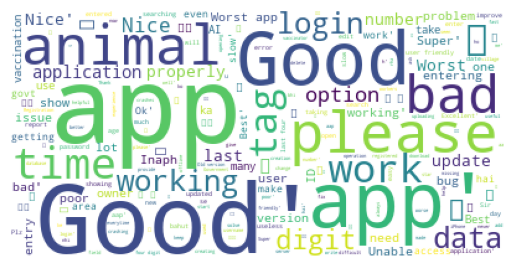

In [33]:
text = dfFlair['content'].values 

wordcloud = WordCloud(background_color='white').generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

C:\Users\intern\AppData\Local\Temp\ipykernel_4900\2950355324.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfFlair['sentiment'], bins = 5)


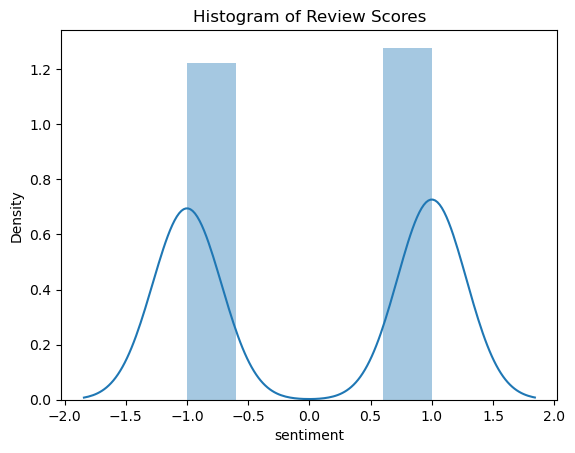

Most Common Score:  1


In [32]:
sns.distplot(dfFlair['sentiment'], bins = 5)
plt.title("Histogram of Review Scores")
plt.show()
print("Most Common Score: ", dfFlair.sentiment.value_counts().index[0])